In [29]:
# 환경 변수에서 API 키 가져오기 
import os
from dotenv import load_dotenv
load_dotenv()
OPEN_API_KEY = os.getenv("OPEN_AI_KEY")

In [30]:
# pandas 불러오기 
import pandas as pd 

train = pd.read_csv('./data/train.csv')
# train.head() # 데이터 프레임의 첫 5 행을 보여주는 명령어. 

In [31]:
# 에이전트 생성 
# langchain 문서 - Integrations 메뉴 - Toolkit - pandas data frame 
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI

In [32]:
# llm 모델 정해주는 코드 

llm = ChatOpenAI(model='gpt-3.5-turbo-0125', temperature=0,
                 api_key=OPEN_API_KEY) # 사실 모델은 4를 쓰는게 더 안정적이다. 

agent_executor = create_pandas_dataframe_agent(
    llm, # 모델 전달해주기 
    train, # 분석에 쓸 데이터프레임을 전달한다. 
    agent_type="openai-tools", # 이건 open ai에서 주는거 쓸거임. 
    verbose=True, # 이거 체크하면 에이전트가 뭘 하는지 로그로출력이 가능하다. 
    return_intermediate_steps=True, # 이걸 True 설정하면 중간과정을 보여준다. 
    allow_dangerous_code=True # 보안 경고에 대응하기 위해 추가
)



테스트 1

In [33]:
# 에이전트를 글로 실행해보자. 
agent_executor.invoke('행과 열의 개수는 얼마인가요?')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape'}`


(1460, 81)이 데이터프레임에는 1460개의 행과 81개의 열이 있습니다.

> Finished chain.


{'input': '행과 열의 개수는 얼마인가요?',
 'output': '이 데이터프레임에는 1460개의 행과 81개의 열이 있습니다.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': 'df.shape'}, log="\nInvoking: `python_repl_ast` with `{'query': 'df.shape'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_G7O93VDVu93OeNWE4JNzvQ5B', 'function': {'arguments': '{"query":"df.shape"}', 'name': 'python_repl_ast'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-0b2ff7e2-3895-441b-8701-839237fad984', tool_calls=[{'name': 'python_repl_ast', 'args': {'query': 'df.shape'}, 'id': 'call_G7O93VDVu93OeNWE4JNzvQ5B', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'python_repl_ast', 'args': '{"query":"df.shape"}', 'id': 'call_G7O93VDVu93OeNWE4JNzvQ5B', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_G7O93VDVu93OeNWE4JNzvQ5B'),
   (1460, 81))]}

테스트 2



> Entering new AgentExecutor chain...


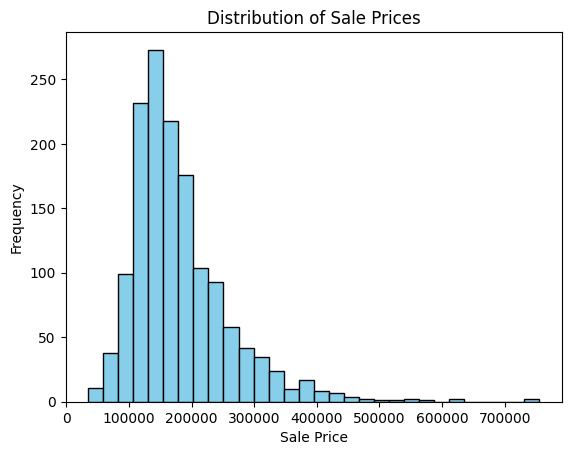


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\nplt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.title('Distribution of Sale Prices')\nplt.show()"}`


주택가격의 분포를 나타내는 히스토그램이 생성되었습니다. 이 히스토그램은 주택가격별 빈도수를 보여줍니다.

> Finished chain.


In [34]:
# 에이전트를 시각화로 실행해보자
response = agent_executor.invoke('주택가격 분포를 히스토그램으로 나타내주세요.')

In [35]:
# 중간과정 보기 
response

{'input': '주택가격 분포를 히스토그램으로 나타내주세요.',
 'output': '주택가격의 분포를 나타내는 히스토그램이 생성되었습니다. 이 히스토그램은 주택가격별 빈도수를 보여줍니다.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\n\nplt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.title('Distribution of Sale Prices')\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\n\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'skyblue\', edgecolor=\'black\')\\nplt.xlabel(\'Sale Price\')\\nplt.ylabel(\'Frequency\')\\nplt.title(\'Distribution of Sale Prices\')\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_3oWTGw3lXh0mTFXEg4QEBYBM', 'function': {'arguments': '{"query":"import matplotlib.pyplot as plt\\n\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'skyblue\', edgecolor=\'black\')\\nplt.xlabel(\'Sal

In [36]:
intermediate_actions = response['intermediate_steps']
len(intermediate_actions)

1

In [37]:
intermediate_actions[0][0].tool_input['query']

"import matplotlib.pyplot as plt\n\nplt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.title('Distribution of Sale Prices')\nplt.show()"

In [39]:
python_code = response['intermediate_steps'][0][0].tool_input['query']
python_code

"import matplotlib.pyplot as plt\n\nplt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.title('Distribution of Sale Prices')\nplt.show()"

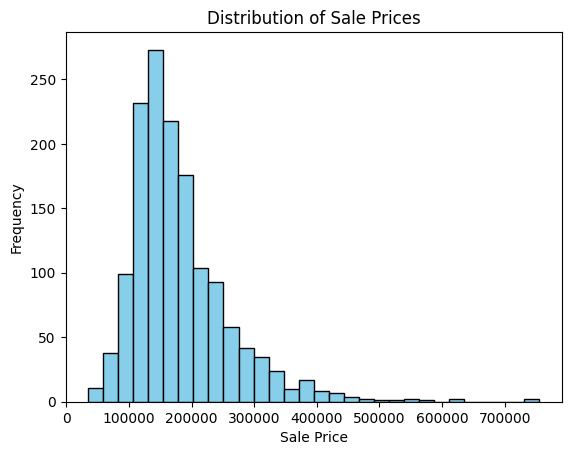

In [41]:
df = train.copy()

exec(python_code)